[IPython Notebook](minimal_contact_binary.ipynb) |  [Python Script](minimal_contact_binary.py)

Minimal Contact Binary System
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

Here we'll initialize a default binary, but ask for it to be created as an overcontact

In [3]:
b_cb = phoebe.default_binary(contact_binary=True)

Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_max=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_max=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_max=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_max=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_max=1.0)  If not addressed, this warning will continue to be raised and will throw an er

We'll compare this to the default detached binary

In [4]:
b_detached = phoebe.default_binary()

Hierarchy
-------------

Let's first look at the hierarchy of the default detached binary, and then compare that to the hierarchy of the overcontact system

In [5]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



In [6]:
print b_cb.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



As you can see, the overcontact system has an additional "component" with method "envelope" and component label "contact_envelope".

Next let's look at the parameters in the envelope and star components. You can see that most of parameters in the envelope class are constrained, while the equivalent radius of the primary is unconstrained. The value of primary equivalent radius constrains the potential and fillout factor of the envelope, as well as the equivalent radius of the secondary.

In [7]:
print b_cb.filter(component='contact_envelope', kind='envelope', context='component')

ParameterSet: 5 parameters
  abun@contact_envelope@compo...: 0.0
* fillout_factor@contact_enve...: 0.641789708077
* pot@contact_envelope@component: 3.40137740723
* pot_min@contact_envelope@co...: 3.20679622409
* pot_max@contact_envelope@co...: 3.75


In [8]:
print b_cb.filter(component='primary', kind='star', context='component')

ParameterSet: 18 parameters
        requiv@primary@component: 1.5 solRad
*   requiv_max@primary@component: 1.67245639728 solRad
*   requiv_min@primary@component: 1.27254185687 solRad
          teff@primary@component: 6000.0 K
       syncpar@primary@component: 1.0
*       period@primary@component: 0.5 d
*         freq@primary@component: 12.56637 rad / d
         pitch@primary@component: 0.0 deg
           yaw@primary@component: 0.0 deg
          incl@primary@component: 90.0 deg
       long_an@primary@component: 0.0 deg
     gravb_bol@primary@component: 0.32
  irrad_frac_refl_bol@primary...: 0.6
* irrad_frac_lost_bol@primary...: 0.4
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_bol@primary@compo...: [0.5 0.5]
*         mass@primary@component: 1.00890679945 solMass
*          sma@primary@component: 1.675 solRad


In [9]:
b_cb['requiv@primary'] = 1.5

In [10]:
b_cb['pot@contact_envelope@component']

<Parameter: pot=3.40137740723 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [11]:
b_cb['fillout_factor@contact_envelope@component']

<Parameter: fillout_factor=0.641789708077 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [12]:
b_cb['requiv@secondary@component']

<Parameter: requiv=1.5 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

Now, of course, if we didn't originally know we wanted a contact binary and built the default detached system, we could still turn it into an contact binary just by changing the hierarchy.

In [13]:
b_detached.add_component('envelope', component='contact_envelope')

<ParameterSet: 5 parameters | qualifiers: abun, pot_max, pot, fillout_factor, pot_min>

In [14]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'], b_detached['contact_envelope'])
print hier

orbit:binary(star:primary, star:secondary, envelope:contact_envelope)


In [15]:
b_detached.set_hierarchy(hier)

Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=1.0)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 08 Oct 2018 18:53 PARAMETERS   WARNING primary is underflowing at L1 and not a contact 

ValueError: 'requiv_max@primary@star@component' is already constrained

In [16]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



Likewise, we can make a contact system detached again simply by removing the envelope from the hierarchy.  The parameters themselves will still exist (unless you remove them), so you can always just change the hierarchy again to change back to an overcontact system.

In [17]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'])
print hier

orbit:binary(star:primary, star:secondary)


In [18]:
b_detached.set_hierarchy(hier)

In [19]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



Adding Datasets
---------------------

In [20]:
b_cb.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [21]:
b_cb.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [22]:
b_cb.add_dataset('lc', times=np.linspace(0,3,21), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [23]:
b_cb.add_dataset('rv', times=np.linspace(0,3,21), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

For comparison, we'll do the same to our detached system

In [24]:
b_detached.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [25]:
b_detached.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [26]:
b_detached.add_dataset('lc', times=np.linspace(0,3,21), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [27]:
b_detached.add_dataset('rv', times=np.linspace(0,3,21), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

Running Compute
--------------------

In [28]:
b_cb.run_compute(irrad_method='none')

<ParameterSet: 26 parameters | kinds: rv, mesh, orb, lc>

In [29]:
b_detached.run_compute(irrad_method='none')

<ParameterSet: 26 parameters | kinds: rv, mesh, orb, lc>

Synthetics
------------------

To ensure compatibility with computing synthetics in detached and semi-detached systems in Phoebe, the synthetic meshes for our overcontact system are attached to each component separetely, instead of the contact envelope.

In [30]:
print b_cb['mesh01@model'].components

['primary', 'secondary']


In [31]:
print b_detached['mesh01@model'].components

['primary', 'secondary']


But dynamical quantities are still attached for each star component - regardless of whether they're in a detached or overcontact system

In [32]:
print b_cb['orb01@model'].components

['primary', 'secondary']


In [33]:
print b_detached['orb01@model'].components

['primary', 'secondary']


Plotting
---------------

### Meshes

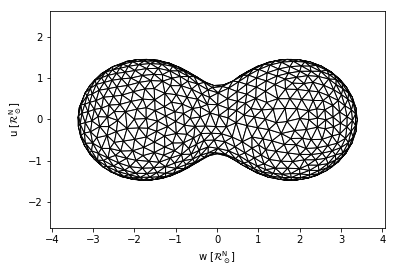

In [34]:
axs, artists = b_cb['mesh01@model'].plot(x='ws', show=True)

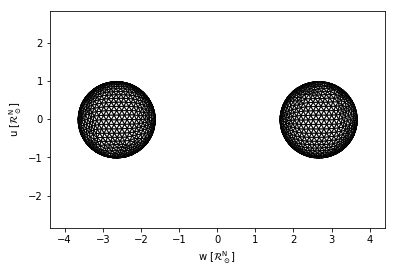

In [35]:
axs, artists = b_detached['mesh01@model'].plot(x='ws', show=True)

### Orbits

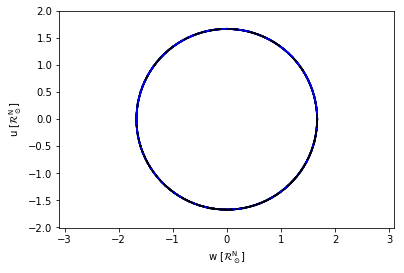

In [36]:
axs, artists = b_cb['orb01@model'].plot(x='ws',show=True)

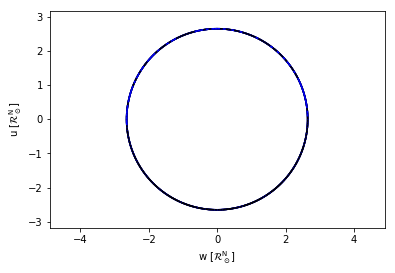

In [37]:
axs, artists = b_detached['orb01@model'].plot(x='ws',show=True)

### Light Curves

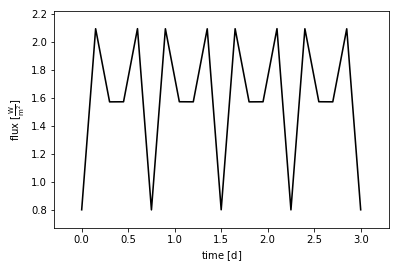

In [38]:
axs, artists = b_cb['lc01@model'].plot(show=True)

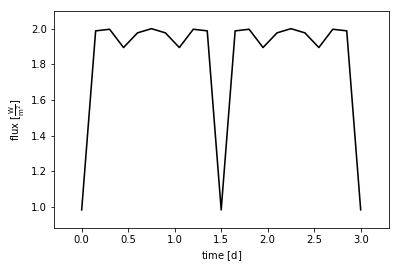

In [39]:
axs, artists = b_detached['lc01@model'].plot(show=True)

### RVs

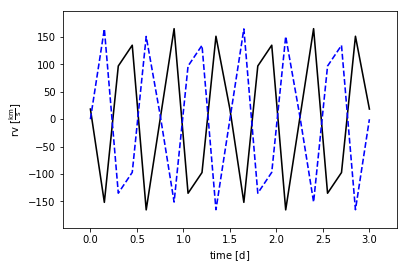

In [40]:
axs, artists = b_cb['rv01@model'].plot(show=True)

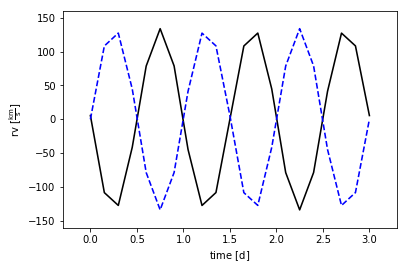

In [41]:
axs, artists = b_detached['rv01@model'].plot(show=True)